In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

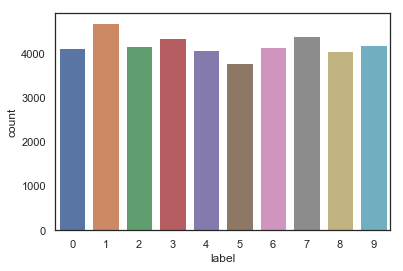

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [3]:
X_train = X_train / 255.0
test = test / 255.0

In [4]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [5]:
n_values = np.max(Y_train) + 1
Y_train = np.eye(n_values)[Y_train]

# Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

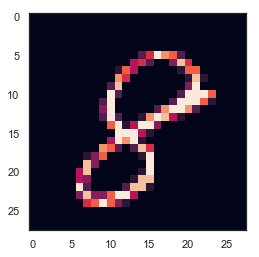

In [7]:
g = plt.imshow(X_train[0][:,:,0])

In [8]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

In [9]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=im_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(32))

# model.add(Dense(10))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', ## 'sparse_categorical_crossentropy'
#               optimizer='adam',
#               metrics=['accuracy'])

# model.fit(X_train,Y_train, batch_size=32, epochs=20, validation_split=0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs_MNIST_16/{}".format(NAME))

            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X_train, Y_train,
                      batch_size=32,
                      epochs=8,
                      validation_split=0.2,
                      callbacks=[tensorboard])

2-conv-64-nodes-1-dense-1555529727
Train on 30240 samples, validate on 7560 samples
Epoch 1/16
30240/30240 [==============================] - 69s 2ms/step - loss: 0.2078 - acc: 0.9350 - val_loss: 0.0927 - val_acc: 0.9722
Epoch 2/16
30240/30240 [==============================] - 67s 2ms/step - loss: 0.0632 - acc: 0.9809 - val_loss: 0.0466 - val_acc: 0.9853
Epoch 3/16
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0548 - val_acc: 0.9851
Epoch 4/16
30240/30240 [==============================] - 48s 2ms/step - loss: 0.0312 - acc: 0.9904 - val_loss: 0.0441 - val_acc: 0.9865
Epoch 5/16
30240/30240 [==============================] - 51s 2ms/step - loss: 0.0233 - acc: 0.9926 - val_loss: 0.0437 - val_acc: 0.9873
Epoch 6/16
30240/30240 [==============================] - 51s 2ms/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0412 - val_acc: 0.9880
Epoch 7/16
30240/30240 [==============================] - 48s 2ms/step - loss: 0.0147 - acc: 0

30240/30240 [==============================] - 83s 3ms/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0493 - val_acc: 0.9898
Epoch 16/16
30240/30240 [==============================] - 66s 2ms/step - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0507 - val_acc: 0.9899
3-conv-64-nodes-1-dense-1555530716
Train on 30240 samples, validate on 7560 samples
Epoch 1/16
30240/30240 [==============================] - 60s 2ms/step - loss: 0.2895 - acc: 0.9093 - val_loss: 0.1219 - val_acc: 0.9631
Epoch 2/16
30240/30240 [==============================] - 62s 2ms/step - loss: 0.0948 - acc: 0.9709 - val_loss: 0.0830 - val_acc: 0.9738
Epoch 3/16
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0698 - acc: 0.9777 - val_loss: 0.0851 - val_acc: 0.9739
Epoch 4/16
30240/30240 [==============================] - 56s 2ms/step - loss: 0.0539 - acc: 0.9838 - val_loss: 0.0536 - val_acc: 0.9824
Epoch 5/16
30240/30240 [==============================] - 53s 2ms/step - loss: 0.0433 - acc: 0.9865 - va

30240/30240 [==============================] - 73s 2ms/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0664 - val_acc: 0.9824
Epoch 9/16
30240/30240 [==============================] - 60s 2ms/step - loss: 0.0214 - acc: 0.9934 - val_loss: 0.0742 - val_acc: 0.9800
Epoch 10/16
30240/30240 [==============================] - 72s 2ms/step - loss: 0.0173 - acc: 0.9946 - val_loss: 0.0775 - val_acc: 0.9784
Epoch 11/16
30240/30240 [==============================] - 78s 3ms/step - loss: 0.0165 - acc: 0.9946 - val_loss: 0.0616 - val_acc: 0.9823
Epoch 12/16
30240/30240 [==============================] - 76s 3ms/step - loss: 0.0134 - acc: 0.9955 - val_loss: 0.0838 - val_acc: 0.9800
Epoch 13/16
30240/30240 [==============================] - 75s 2ms/step - loss: 0.0115 - acc: 0.9960 - val_loss: 0.0805 - val_acc: 0.9808
Epoch 14/16
30240/30240 [==============================] - 73s 2ms/step - loss: 0.0136 - acc: 0.9962 - val_loss: 0.0707 - val_acc: 0.9848
Epoch 15/16
30240/30240 [======================

30240/30240 [==============================] - 101s 3ms/step - loss: 0.0229 - acc: 0.9923 - val_loss: 0.0408 - val_acc: 0.9880ss: - ET
Epoch 5/16
30240/30240 [==============================] - 84s 3ms/step - loss: 0.0181 - acc: 0.9943 - val_loss: 0.0442 - val_acc: 0.9876
Epoch 6/16
30240/30240 [==============================] - 147s 5ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0393 - val_acc: 0.9894
Epoch 7/16
 4320/30240 [===>..........................] - ETA: 2:03 - loss: 0.0071 - acc: 0.9977WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.476432). Check your callbacks.


30240/30240 [==============================] - 107s 4ms/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0486 - val_acc: 0.9885
Epoch 8/16
 1536/30240 [>.............................] - ETA: 2:30:59 - loss: 0.0100 - acc: 0.9961WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.109352). Check your callbacks.


30240/30240 [==============================] - 556s 18ms/step - loss: 0.0104 - acc: 0.9967 - val_loss: 0.0463 - val_acc: 0.9892
Epoch 9/16
30240/30240 [==============================] - 80s 3ms/step - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0387 - val_acc: 0.9897
Epoch 10/16
30240/30240 [==============================] - 95s 3ms/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.0454 - val_acc: 0.9898A: 1s - loss: 0.0057 - ac - ETA: 0s - loss: 0.0057 - acc: 
Epoch 11/16
14048/30240 [============>.................] - ETA: 1:09 - loss: 0.0052 - acc: 0.9987WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.852755). Check your callbacks.


19616/30240 [==================>...........] - ETA: 58s - loss: 0.0075 - acc: 0.9980WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.101518). Check your callbacks.


30240/30240 [==============================] - 140s 5ms/step - loss: 0.0080 - acc: 0.9977 - val_loss: 0.0479 - val_acc: 0.9889
Epoch 12/16
30240/30240 [==============================] - 86s 3ms/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0572 - val_acc: 0.9877A - ETA: 3s - loss: 0.0057 - acc: 0.998 - ETA
Epoch 13/16
30240/30240 [==============================] - 84s 3ms/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0708 - val_acc: 0.9848
Epoch 14/16
30240/30240 [==============================] - 88s 3ms/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0488 - val_acc: 0.9885
Epoch 15/16
30240/30240 [==============================] - 80s 3ms/step - loss: 0.0053 - acc: 0.9987 - val_loss: 0.0577 - val_acc: 0.9897
Epoch 16/16
30240/30240 [==============================] - 70s 2ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.0534 - val_acc: 0.9901
3-conv-128-nodes-1-dense-1555533794
Train on 30240 samples, validate on 7560 samples
Epoch 1/16
30240/30240 [=============================

30240/30240 [==============================] - 87s 3ms/step - loss: 0.0094 - acc: 0.9968 - val_loss: 0.1023 - val_acc: 0.9784
Epoch 12/16
30240/30240 [==============================] - 79s 3ms/step - loss: 0.0123 - acc: 0.9958 - val_loss: 0.0736 - val_acc: 0.9824
Epoch 13/16
30240/30240 [==============================] - 78s 3ms/step - loss: 0.0121 - acc: 0.9964 - val_loss: 0.0669 - val_acc: 0.9844
Epoch 14/16
30240/30240 [==============================] - 76s 3ms/step - loss: 0.0073 - acc: 0.9979 - val_loss: 0.0692 - val_acc: 0.9865
Epoch 15/16
30240/30240 [==============================] - 66s 2ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0715 - val_acc: 0.9862
Epoch 16/16
30240/30240 [==============================] - 55s 2ms/step - loss: 0.0105 - acc: 0.9969 - val_loss: 0.0618 - val_acc: 0.9869
2-conv-64-nodes-2-dense-1555535129
Train on 30240 samples, validate on 7560 samples
Epoch 1/16
30240/30240 [==============================] - 77s 3ms/step - loss: 0.2247 - acc: 0.9294 

30240/30240 [==============================] - 92s 3ms/step - loss: 0.1767 - acc: 0.9451 - val_loss: 0.0543 - val_acc: 0.9828
Epoch 2/16
30240/30240 [==============================] - 87s 3ms/step - loss: 0.0524 - acc: 0.9835 - val_loss: 0.0554 - val_acc: 0.9836
Epoch 3/16
30240/30240 [==============================] - 84s 3ms/step - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0432 - val_acc: 0.9874
Epoch 4/16
30240/30240 [==============================] - 83s 3ms/step - loss: 0.0255 - acc: 0.9910 - val_loss: 0.0468 - val_acc: 0.9861
Epoch 5/16
30240/30240 [==============================] - 73s 2ms/step - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0458 - val_acc: 0.9878
Epoch 6/16
30240/30240 [==============================] - 79s 3ms/step - loss: 0.0145 - acc: 0.9950 - val_loss: 0.0456 - val_acc: 0.9877
Epoch 7/16
30240/30240 [==============================] - 76s 3ms/step - loss: 0.0158 - acc: 0.9952 - val_loss: 0.0455 - val_acc: 0.9886
Epoch 8/16
30240/30240 [============================

30240/30240 [==============================] - 76s 3ms/step - loss: 0.0270 - acc: 0.9901 - val_loss: 0.0432 - val_acc: 0.9857
Epoch 6/16
30240/30240 [==============================] - 60s 2ms/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0392 - val_acc: 0.9886
Epoch 7/16
30240/30240 [==============================] - 61s 2ms/step - loss: 0.0186 - acc: 0.9938 - val_loss: 0.0473 - val_acc: 0.9857
Epoch 8/16
30240/30240 [==============================] - 59s 2ms/step - loss: 0.0161 - acc: 0.9948 - val_loss: 0.0427 - val_acc: 0.9864
Epoch 9/16
30240/30240 [==============================] - 62s 2ms/step - loss: 0.0139 - acc: 0.9954 - val_loss: 0.0558 - val_acc: 0.9892
Epoch 10/16
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0618 - val_acc: 0.9848
Epoch 11/16
30240/30240 [==============================] - 62s 2ms/step - loss: 0.0118 - acc: 0.9963 - val_loss: 0.0591 - val_acc: 0.9861
Epoch 12/16
30240/30240 [=========================

30240/30240 [==============================] - 103s 3ms/step - loss: 0.3466 - acc: 0.8861 - val_loss: 0.1319 - val_acc: 0.9587
Epoch 2/16
30240/30240 [==============================] - 103s 3ms/step - loss: 0.1029 - acc: 0.9685 - val_loss: 0.0747 - val_acc: 0.9772
Epoch 3/16
30240/30240 [==============================] - 103s 3ms/step - loss: 0.0739 - acc: 0.9775 - val_loss: 0.0832 - val_acc: 0.9749
Epoch 4/16
30240/30240 [==============================] - 103s 3ms/step - loss: 0.0581 - acc: 0.9823 - val_loss: 0.0696 - val_acc: 0.9782
Epoch 5/16
30240/30240 [==============================] - 108s 4ms/step - loss: 0.0511 - acc: 0.9843 - val_loss: 0.0838 - val_acc: 0.9735
Epoch 6/16
30240/30240 [==============================] - 84s 3ms/step - loss: 0.0417 - acc: 0.9873 - val_loss: 0.0703 - val_acc: 0.9788
Epoch 7/16
30240/30240 [==============================] - 88s 3ms/step - loss: 0.0326 - acc: 0.9893 - val_loss: 0.0680 - val_acc: 0.9806
Epoch 8/16
30240/30240 [=======================

30240/30240 [==============================] - 112s 4ms/step - loss: 0.0138 - acc: 0.9961 - val_loss: 0.0444 - val_acc: 0.9905
Epoch 11/16
30240/30240 [==============================] - 60s 2ms/step - loss: 0.0107 - acc: 0.9967 - val_loss: 0.0451 - val_acc: 0.9897
Epoch 12/16
30240/30240 [==============================] - 90s 3ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0501 - val_acc: 0.9889
Epoch 13/16
30240/30240 [==============================] - 183s 6ms/step - loss: 0.0068 - acc: 0.9983 - val_loss: 0.0481 - val_acc: 0.9902
Epoch 14/16
 7072/30240 [======>.......................] - ETA: 1:46 - loss: 0.0033 - acc: 0.9990WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.210905). Check your callbacks.


30240/30240 [==============================] - 220s 7ms/step - loss: 0.0091 - acc: 0.9973 - val_loss: 0.0664 - val_acc: 0.9865
Epoch 15/16
 6592/30240 [=====>........................] - ETA: 10:47:46 - loss: 0.0109 - acc: 0.9968WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.373714). Check your callbacks.


 7168/30240 [======>.......................] - ETA: 15:27:50 - loss: 0.0104 - acc: 0.9969WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.234993). Check your callbacks.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

dense_layers = [1, 2, 3]
layer_sizes = [64, 128]
conv_layers = [2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs_MNIST_16/{}".format(NAME))

            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X_train, Y_train,
                      batch_size=32,
                      epochs=16,
                      validation_split=0.2,
                      callbacks=[tensorboard])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

dense_layers = [1]
layer_sizes = [64, 128]
conv_layers = [2]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (5, 5), input_shape=X_train.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs_MNIST_16/{}".format(NAME))

            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X_train, Y_train,
                      batch_size=32,
                      epochs=16,
                      validation_split=0.2,
                      callbacks=[tensorboard])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

dense_layers = [1]
layer_sizes = [128]
conv_layers = [2]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            fmodel = Sequential()

            fmodel.add(Conv2D(layer_size, (5, 5), input_shape=X_train.shape[1:]))
            fmodel.add(Activation('relu'))
            fmodel.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                fmodel.add(Conv2D(layer_size, (3, 3)))
                fmodel.add(Activation('relu'))
                fmodel.add(MaxPooling2D(pool_size=(2, 2)))

            fmodel.add(Flatten())

            for _ in range(dense_layer):
                fmodel.add(Dense(layer_size))
                fmodel.add(Activation('relu'))

            fmodel.add(Dense(10))
            fmodel.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs_MNIST/{}".format(NAME))

            fmodel.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            fmodel.fit(X_train, Y_train,
                      batch_size=32,
                      epochs=8,
                      validation_split=0.2,
                      callbacks=[tensorboard])
            
fmodel.save('128x2-3x3-2fc.model')

2-conv-128-nodes-1-dense-1555594236
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 74s 2ms/step - loss: 0.1511 - acc: 0.9535 - val_loss: 0.0803 - val_acc: 0.9754
Epoch 2/8
30240/30240 [==============================] - 73s 2ms/step - loss: 0.0464 - acc: 0.9853 - val_loss: 0.0458 - val_acc: 0.9849
Epoch 3/8
30240/30240 [==============================] - 73s 2ms/step - loss: 0.0315 - acc: 0.9902 - val_loss: 0.0343 - val_acc: 0.9881
Epoch 4/8
30240/30240 [==============================] - 74s 2ms/step - loss: 0.0234 - acc: 0.9923 - val_loss: 0.0392 - val_acc: 0.9899
Epoch 5/8
19040/30240 [=================>............] - ETA: 33s - loss: 0.0184 - acc: 0.9942WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.117136). Check your callbacks.


21920/30240 [====================>.........] - ETA: 27s - loss: 0.0187 - acc: 0.9942WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.100322). Check your callbacks.


30240/30240 [==============================] - 94s 3ms/step - loss: 0.0186 - acc: 0.9942 - val_loss: 0.0491 - val_acc: 0.9877
Epoch 6/8
30240/30240 [==============================] - 86s 3ms/step - loss: 0.0154 - acc: 0.9948 - val_loss: 0.0470 - val_acc: 0.9881
Epoch 7/8
14432/30240 [=============>................] - ETA: 34s - loss: 0.0089 - acc: 0.9967WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.109336). Check your callbacks.


30240/30240 [==============================] - 75s 2ms/step - loss: 0.0123 - acc: 0.9959 - val_loss: 0.0454 - val_acc: 0.9870
Epoch 8/8
30240/30240 [==============================] - 76s 3ms/step - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0595 - val_acc: 0.9882


In [11]:
fmodel = tf.keras.models.load_model('128x2-3x3-2fc.model')

prediction = fmodel.predict(test)

In [12]:
print(prediction)  # will be a list in a list.
print(prediction.shape)
# print(CATEGORIES[int(prediction[0][0])])

[[1.4873515e-12 5.3649178e-17 1.0000000e+00 ... 1.7479258e-11
  1.0256698e-13 4.8823376e-16]
 [1.0000000e+00 1.2490311e-19 1.9432494e-12 ... 5.9509189e-09
  3.6927155e-15 8.7435891e-13]
 [4.6993827e-16 3.2929621e-15 1.6743444e-13 ... 4.4144875e-11
  3.8805283e-09 9.9999976e-01]
 ...
 [2.0201736e-20 5.4592705e-15 3.8613031e-13 ... 2.9581604e-12
  2.6700322e-14 2.7418926e-14]
 [9.9184864e-13 3.2774765e-13 2.4737143e-13 ... 1.0221912e-06
  4.5138775e-11 9.9997330e-01]
 [4.5689869e-14 4.3269595e-18 1.0000000e+00 ... 1.9112184e-12
  9.5920440e-13 4.2013450e-17]]
(28000, 10)


In [13]:
results = np.argmax(prediction,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("sub.csv",index=False)